In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn import metrics
from statsmodels.formula.api import ols
import statsmodels.api as sm
%matplotlib inline



In [2]:
os.chdir("C:\\Users\\HP\\Desktop\\project2")
print(os.getcwd())

C:\Users\HP\Desktop\project2


In [3]:
training_data = pd.read_csv("day.csv", encoding='utf-8',index_col='dteday',parse_dates=True,infer_datetime_format=True,dayfirst=True)

In [4]:
training_data.head(20)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
2011-01-06,6,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
2011-01-07,7,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
2011-01-08,8,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
2011-01-09,9,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822


In [5]:
training_data.tail(20)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2012-12-12,712,4,1,12,0,3,1,2,0.297500,0.297338,0.538333,0.162937,310,5009,5319
2012-12-13,713,4,1,12,0,4,1,1,0.295833,0.294188,0.485833,0.174129,425,5107,5532
2012-12-14,714,4,1,12,0,5,1,1,0.281667,0.294192,0.642917,0.131229,429,5182,5611
2012-12-15,715,4,1,12,0,6,0,1,0.324167,0.338383,0.650417,0.106350,767,4280,5047
2012-12-16,716,4,1,12,0,0,0,2,0.362500,0.369938,0.838750,0.100742,538,3248,3786
2012-12-17,717,4,1,12,0,1,1,2,0.393333,0.401500,0.907083,0.098258,212,4373,4585
2012-12-18,718,4,1,12,0,2,1,1,0.410833,0.409708,0.666250,0.221404,433,5124,5557
2012-12-19,719,4,1,12,0,3,1,1,0.332500,0.342162,0.625417,0.184092,333,4934,5267
2012-12-20,720,4,1,12,0,4,1,2,0.330000,0.335217,0.667917,0.132463,314,3814,4128


In [6]:
training_data.shape
#So we have 731 data entries with total 16 columns.
#Some columns are categorical while others are numeric in nature.
# The variable 'cnt'=='casual'+'registered'

(731, 15)

In [7]:
training_data.dtypes

instant         int64
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2011-01-01 to 2012-12-31
Data columns (total 15 columns):
instant       731 non-null int64
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11)
memory usage: 91.4 KB


In [9]:
training_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
#Computing missing values
def print_missing_values(df):  
    missing_values = pd.DataFrame(df.isna().sum())
    missing_values = missing_values.reset_index()
    missing_values.columns = ['Variables', 'missing_values']
    missing_values['missing_percentage'] = missing_values['missing_values']*100/df.shape[0]
    print("======================= Shape =======================")
    print(df.shape)
    print("\n======================= Missing Values Summary =======================")
    print(missing_values)
    return

In [11]:
print_missing_values(training_data)

======================= Shape =======================
(731, 15)

======================= Missing Values Summary =======================
     Variables  missing_values  missing_percentage
0      instant               0                 0.0
1       season               0                 0.0
2           yr               0                 0.0
3         mnth               0                 0.0
4      holiday               0                 0.0
5      weekday               0                 0.0
6   workingday               0                 0.0
7   weathersit               0                 0.0
8         temp               0                 0.0
9        atemp               0                 0.0
10         hum               0                 0.0
11   windspeed               0                 0.0
12      casual               0                 0.0
13  registered               0                 0.0
14         cnt               0                 0.0


In [12]:
#Dividing data for our ease
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

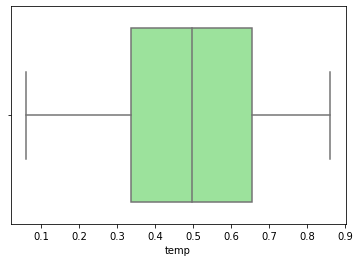

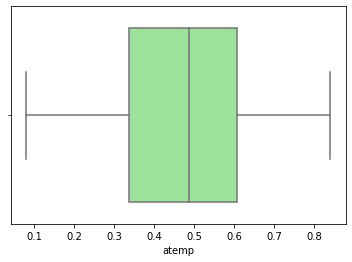

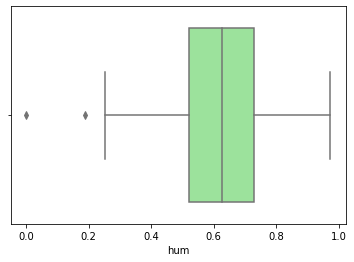

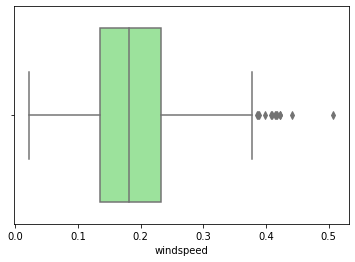

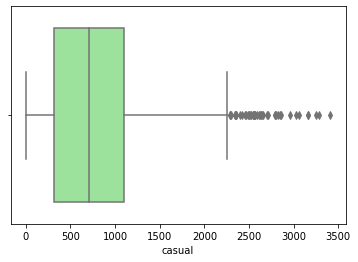

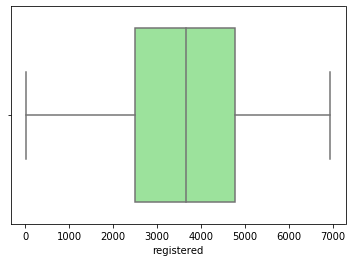

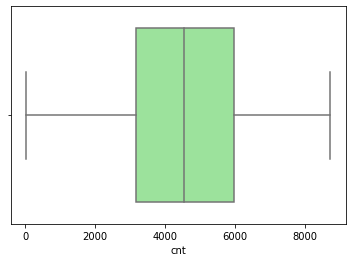

In [13]:
for i in numerical_columns:
    sns.boxplot(x=training_data[i],color='lightgreen')
    plt.show()

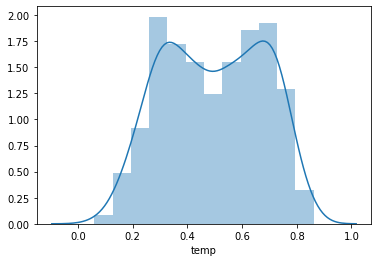

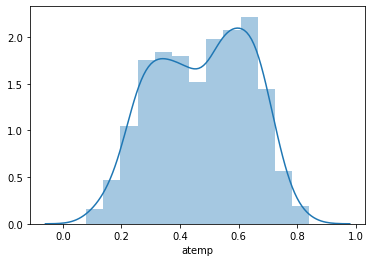

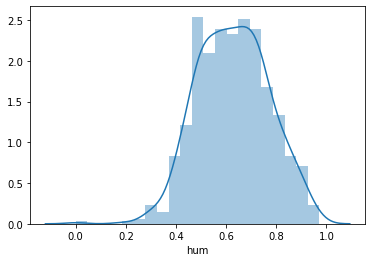

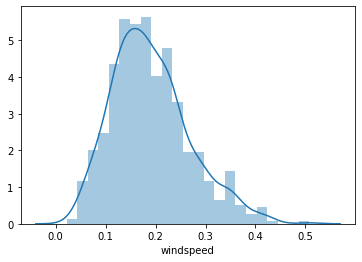

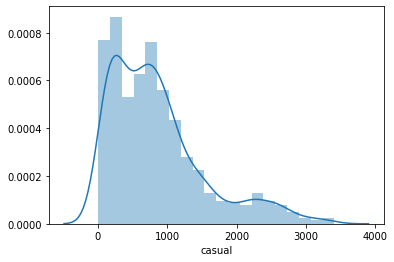

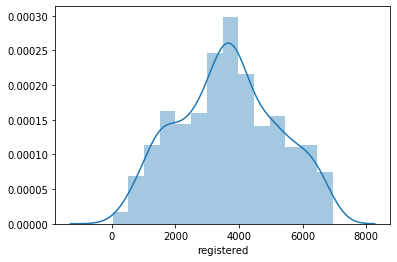

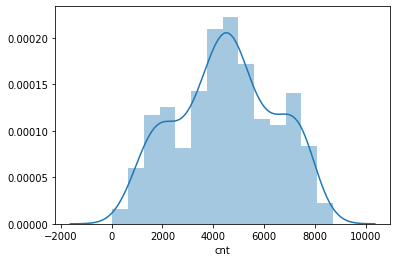

In [14]:
for j in numerical_columns:
    sns.distplot(training_data[j])
    plt.show()

In [15]:
#Observations
'''
 
1.> There are few outliers in hum and windspeed which i'll take into consideration later.
2.> Data is not noisy though.
3.> No outleirs in temp and atemp
4.> Little skewness

'''


"\n \n1.> There are few outliers in hum and windspeed which i'll take into consideration later.\n2.> Data is not noisy though.\n3.> No outleirs in temp and atemp\n4.> Little skewness\n\n"

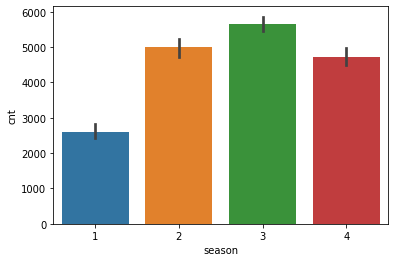

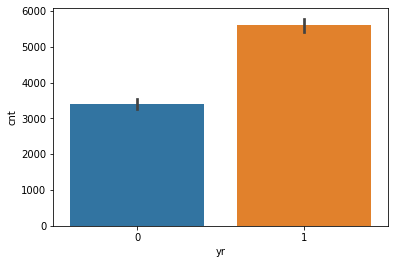

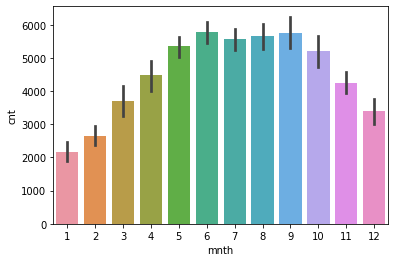

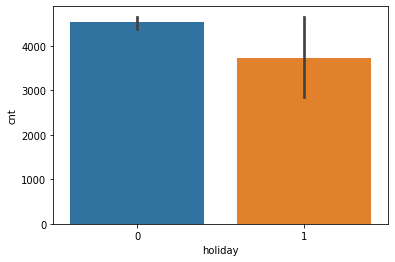

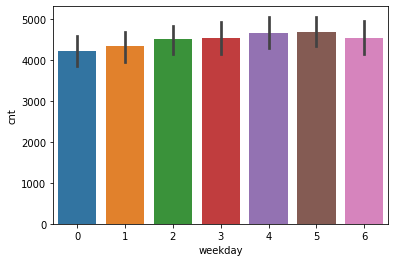

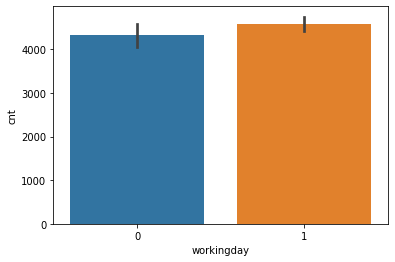

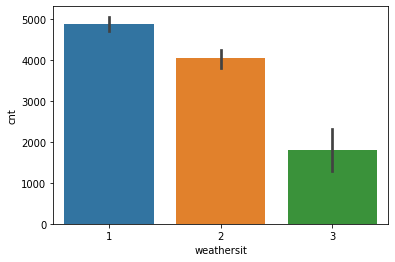

In [16]:
for k in categorical_columns:
    sns.barplot(x=training_data[k],y=training_data['cnt'])
    plt.show()

In [17]:
#Observation
'''
1.> First barplot shows highest count during Fall and least during springer.
2.> Whether holiday or not count does't getting that much affected.
3.> Day of the week doesn't influence the count.

'''

"\n1.> First barplot shows highest count during Fall and least during springer.\n2.> Whether holiday or not count does't getting that much affected.\n3.> Day of the week doesn't influence the count.\n\n"

In [18]:
#Getting unique categories count
training_data[categorical_columns].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [19]:
print("========================= Frequency of different values of categorical variables =========================")
for i in categorical_columns:
    print(i)
    print()
    print(training_data[i].value_counts())
    print("-----------------------------------------------------------------------------------------------------")


========================= Frequency of different values of categorical variables =========================
season

3    188
2    184
1    181
4    178
Name: season, dtype: int64
-----------------------------------------------------------------------------------------------------
yr

1    366
0    365
Name: yr, dtype: int64
-----------------------------------------------------------------------------------------------------
mnth

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     57
Name: mnth, dtype: int64
-----------------------------------------------------------------------------------------------------
holiday

0    710
1     21
Name: holiday, dtype: int64
-----------------------------------------------------------------------------------------------------
weekday

6    105
1    105
0    105
5    104
4    104
3    104
2    104
Name: weekday, dtype: int64
---------------------------------------------------------------------------

In [20]:
# Droping column instant which is nothing but an ID
training_data.drop(columns=['instant'], inplace=True)
training_data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341


In [21]:
# Standard deviation is most underrated tool but is extremely important.
# I'll check the standard deviation of our variables and will try to keep it similar after outlier treatment(imputation).
# Standard deviations aren't "good" or "bad". They are indicators of how spread out your data is.
# Distributions with a cov>1 are considered to be high variance whereas those with a cov<1 are considered to be low-variance.

In [22]:
training_data.std()

season           1.110807
yr               0.500342
mnth             3.451913
holiday          0.167155
weekday          2.004787
workingday       0.465233
weathersit       0.544894
temp             0.183051
atemp            0.162961
hum              0.142429
windspeed        0.077498
casual         686.622488
registered    1560.256377
cnt           1937.211452
dtype: float64

In [23]:
#Calculating outliers and replacing them with NA 
def outlier_treatment(var_name):
    q75, q25 = np.percentile(training_data[var_name], [75 ,25])
    iqr = q75 - q25
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    training_data.loc[training_data[var_name] < minimum,var_name] = np.nan
    training_data.loc[training_data[var_name] > maximum,var_name] = np.nan

In [24]:
outlier_treatment('hum')

In [25]:
training_data['hum'].isnull().sum()

2

In [26]:
# We have checked standard deviation for 3 imputation methods-mean,median,KNN.
# Standard deviation remains nearly same with mean imputation.
# Although KNN is a good option but recently this FancyImpute library is not supported.
#Impute with mean
training_data['hum'] = training_data['hum'].fillna(training_data['hum'].mean())

In [27]:
outlier_treatment('windspeed')

In [28]:
training_data['windspeed'].isnull().sum()

13

In [29]:
training_data['windspeed'] = training_data['windspeed'].fillna(training_data['windspeed'].mean())

In [30]:
training_data.std()

season           1.110807
yr               0.500342
mnth             3.451913
holiday          0.167155
weekday          2.004787
workingday       0.465233
weathersit       0.544894
temp             0.183051
atemp            0.162961
hum              0.139566
windspeed        0.071149
casual         686.622488
registered    1560.256377
cnt           1937.211452
dtype: float64

In [31]:
# 0.142429 - 0.139566 == 0.002863
# 0.077498 - 0.071149 == 0.006349
# Thus we can opt for mean as a imputation as the difference is negligible.

(7.0, 0.0)

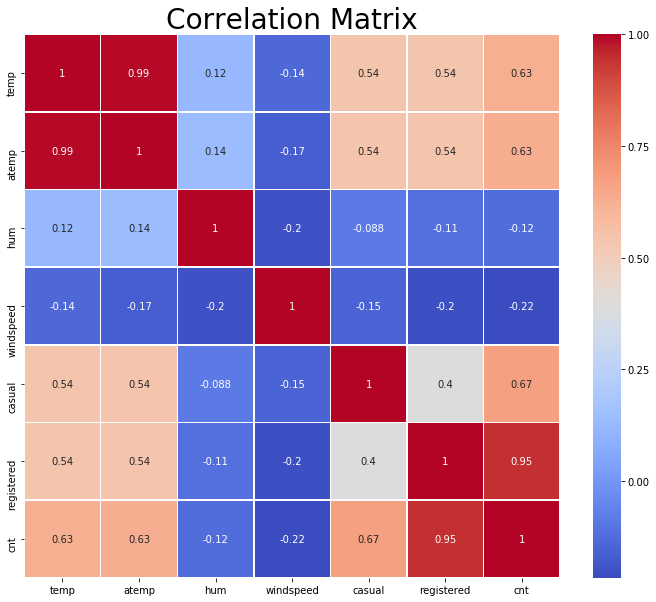

In [32]:
# Calculating Correlation matrix
correlation_matrix = training_data[['temp','atemp','hum','windspeed','casual', 'registered','cnt']].corr()

# Converting it to dataframe
correlation_matrix = pd.DataFrame(correlation_matrix)

# Plotting heatmap for correlation matrix
plt.figure(figsize = (12, 10))
ax = sns.heatmap(correlation_matrix, cmap='coolwarm',linewidths=0.5, linecolor='w', annot=True)
plt.title('Correlation Matrix', size=28)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [33]:
# Observations
# 'temp' and 'atemp' are very highly correlated with each other.
# Similarly, 'registered' and 'cnt' are highly correlated with each other

In [34]:
# Chi-Square test for independence of categorical variable
'''
Hypothetical Test :
Null Hypothesis: 2 variables are independent.
Alternate Hypothesis: 2 variables are not independent.
If p-value is less than 0.05 then we reject the null hypothesis saying that 2 variables are dependent.
And if p-value is greater than 0.05 then we accept the null hypothesis saying that 2 variables are independent. 
There should be no dependencies between independent variables.
So we will remove that variable whose p-value with other variable is low than 0.05.
And we will keep that variable whose p-value with other variable is high than 0.05
'''

'\nHypothetical Test :\nNull Hypothesis: 2 variables are independent.\nAlternate Hypothesis: 2 variables are not independent.\nIf p-value is less than 0.05 then we reject the null hypothesis saying that 2 variables are dependent.\nAnd if p-value is greater than 0.05 then we accept the null hypothesis saying that 2 variables are independent. \nThere should be no dependencies between independent variables.\nSo we will remove that variable whose p-value with other variable is low than 0.05.\nAnd we will keep that variable whose p-value with other variable is high than 0.05\n'

In [35]:
'''
The Pearson’s chi-squared test for independence can be calculated in Python using the chi2_contingency() SciPy function.
The function takes an array as input representing the contingency table for the two categorical variables.
It returns the calculated statistic and p-value for interpretation.
It also returns the calculated degrees of freedom and table of expected frequencies.
'''

for i in categorical_columns:
    for j in categorical_columns:
        if(i != j):
            chistat, p_value, dof, expected_f = chi2_contingency(pd.crosstab(training_data[i], training_data[j]))
            if(p_value < 0.05):
                print(i,"and",j,"are dependent having p value",p_value,'...Thus remove it !')
            else:
                print(i,"and",j,"are independent having p value",p_value,'...Thus keep it !')

season and yr are independent having p value 0.9999288084245916 ...Thus keep it !
season and mnth are dependent having p value 0.0 ...Thus remove it !
season and holiday are independent having p value 0.6831687073042003 ...Thus keep it !
season and weekday are independent having p value 0.9999999999988407 ...Thus keep it !
season and workingday are independent having p value 0.8865568364019545 ...Thus keep it !
season and weathersit are dependent having p value 0.021179301044733697 ...Thus remove it !
yr and season are independent having p value 0.9999288084245916 ...Thus keep it !
yr and mnth are independent having p value 0.9999999999999892 ...Thus keep it !
yr and holiday are independent having p value 0.9949247279855291 ...Thus keep it !
yr and weekday are independent having p value 0.9999995848511959 ...Thus keep it !
yr and workingday are independent having p value 0.9799434134248637 ...Thus keep it !
yr and weathersit are independent having p value 0.12737941480418666 ...Thus ke

In [36]:
# Variables which are highly dependent on each other based on p-values are:
'''
holiday and weekday-8.56e-11
hoilday and workingday-4.033e-11
workingday and holiday-4.033e-11
workingday and weekday-6.77e-11
weathersit and season-0.0211
weekday and holiday-8.56e-11
weekday and workingday-6.77e-136
season and weathersit-0.0211
season and month-0
weathersit and mnth-0.014
mnth and season-0
mnth and weathersit-0.014
So besides season,holiday and yr we will remove weekday,weathersit,workingday,mnth.
'''


'\nholiday and weekday-8.56e-11\nhoilday and workingday-4.033e-11\nworkingday and holiday-4.033e-11\nworkingday and weekday-6.77e-11\nweathersit and season-0.0211\nweekday and holiday-8.56e-11\nweekday and workingday-6.77e-136\nseason and weathersit-0.0211\nseason and month-0\nweathersit and mnth-0.014\nmnth and season-0\nmnth and weathersit-0.014\nSo besides season,holiday and yr we will remove weekday,weathersit,workingday,mnth.\n'

In [37]:
#Creating a backup copy
bckp_training_data2=training_data.copy()

In [38]:
training_data = training_data.drop(['mnth','weekday','weathersit','workingday'],axis = 1)

In [39]:
training_data.head(5)

,season,yr,holiday,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,
2011-01-01,1,0,0,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,1,0,0,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,1,0,0,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,1,0,0,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,1,0,0,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [40]:
cat_var=['season','holiday','yr']
training_data[cat_var]=training_data[cat_var].apply(lambda x: x.astype('category') )
num_var=['temp','atemp','hum','windspeed','cnt']
training_data[num_var]=training_data[num_var].apply(lambda x: x.astype('float') )

In [41]:
# Multicollinearity Test
'''
A variance inflation factor(VIF) detects multicollinearity in regression analysis.
Multicollinearity is when there’s correlation between predictors (i.e. independent variables) in a model.
It’s presence can adversely affect your regression results.
The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model.

A rule of thumb for interpreting the variance inflation factor:
1 = not correlated.
Between 1 and 5 = moderately correlated.
Greater than 5 = highly correlated.

'''

num_v=['temp','atemp','hum','windspeed']
#Normalisation
for i in num_v:
    print(i)
    training_data[i] = ( training_data[i] - min( training_data[i]))/(max( training_data[i]) - min( training_data[i]))

temp
atemp
hum
windspeed


In [42]:
training_data.dtypes

season        category
yr            category
holiday       category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt            float64
dtype: object

In [43]:
outcome, predictors = dmatrices('cnt ~ + season + yr + holiday + temp + atemp + hum + windspeed',training_data, return_type='dataframe')

# calculating VIF for each individual Predictors
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
vif["Variables"] = predictors.columns
vif

,VIF,Variables
0,26.826131,Intercept
1,2.624139,season[T.2]
2,4.636714,season[T.3]
3,1.838976,season[T.4]
4,1.029142,yr[T.1]
5,1.003707,holiday[T.1]
6,70.103298,temp
7,66.209110,atemp
8,1.112156,hum
9,1.134103,windspeed


In [44]:
# FEATURE ENGINEERING


#From above Dataframe we see that there is Multicollinearity in our Data
#temp and atemp has highest VIF value
#Instead of dropping one variable i'm combining those two as mean value as a part of feature engineering

In [45]:
columns = ['temp','atemp']
training_data['mean_temperature'] = training_data.apply(lambda row: row[columns].mean(), axis=1)

In [46]:
training_data.head(5)

,season,yr,holiday,temp,atemp,hum,windspeed,casual,registered,cnt,mean_temperature
dteday,,,,,,,,,,,
2011-01-01,1,0,0,0.355170,0.373517,0.767981,0.388102,331,654,985.0,0.364343
2011-01-02,1,0,0,0.379232,0.360541,0.615202,0.635752,131,670,801.0,0.369886
2011-01-03,1,0,0,0.171000,0.144830,0.254904,0.635105,120,1229,1349.0,0.157915
2011-01-04,1,0,0,0.175530,0.174649,0.468123,0.387681,108,1454,1562.0,0.175090
2011-01-05,1,0,0,0.209120,0.197158,0.254464,0.462471,82,1518,1600.0,0.203139


In [47]:
training_data = training_data.drop(['temp','atemp'],axis = 1)

In [48]:
training_data.head(5)

,season,yr,holiday,hum,windspeed,casual,registered,cnt,mean_temperature
dteday,,,,,,,,,
2011-01-01,1,0,0,0.767981,0.388102,331,654,985.0,0.364343
2011-01-02,1,0,0,0.615202,0.635752,131,670,801.0,0.369886
2011-01-03,1,0,0,0.254904,0.635105,120,1229,1349.0,0.157915
2011-01-04,1,0,0,0.468123,0.387681,108,1454,1562.0,0.175090
2011-01-05,1,0,0,0.254464,0.462471,82,1518,1600.0,0.203139


In [49]:
one_hot_variable = ['season','holiday','yr']

In [50]:
#Creating dummies for categorical variables
'''
Dummy variables are useful because they enable us to use a single regression equation to represent multiple groups.
This means that we don't need to write out separate equation models for each subgroup.
The dummy variables act like 'switches' that turn various parameters on and off in an equation.
'''
for i in one_hot_variable:
    dummies = pd.get_dummies(training_data[i], prefix = i)
    training_data = training_data.join(dummies)

In [51]:
training_data = training_data.drop(['season','holiday','yr'],axis = 1)

In [52]:
training_data.head(5)

,hum,windspeed,casual,registered,cnt,mean_temperature,season_1,season_2,season_3,season_4,holiday_0,holiday_1,yr_0,yr_1
dteday,,,,,,,,,,,,,,
2011-01-01,0.767981,0.388102,331,654,985.0,0.364343,1,0,0,0,1,0,1,0
2011-01-02,0.615202,0.635752,131,670,801.0,0.369886,1,0,0,0,1,0,1,0
2011-01-03,0.254904,0.635105,120,1229,1349.0,0.157915,1,0,0,0,1,0,1,0
2011-01-04,0.468123,0.387681,108,1454,1562.0,0.175090,1,0,0,0,1,0,1,0
2011-01-05,0.254464,0.462471,82,1518,1600.0,0.203139,1,0,0,0,1,0,1,0


In [53]:
#Splitting data into train and test...
#To avoid random shuffling we are not using train_test_split
#The training data should be the previous data and test data should be the latest data.
#We will fit our model on the training data and test on the newest data, to understand how our model performs on new, unseen data.

#Separating target variables
t_cnt = training_data.iloc[:,4]
t_casual = training_data.iloc[:,2]
t_registered = training_data.iloc[:,3]
t_cnt.head(),t_casual.head(),t_registered.head()


(dteday
 2011-01-01     985.0
 2011-01-02     801.0
 2011-01-03    1349.0
 2011-01-04    1562.0
 2011-01-05    1600.0
 Name: cnt, dtype: float64, dteday
 2011-01-01    331
 2011-01-02    131
 2011-01-03    120
 2011-01-04    108
 2011-01-05     82
 Name: casual, dtype: int64, dteday
 2011-01-01     654
 2011-01-02     670
 2011-01-03    1229
 2011-01-04    1454
 2011-01-05    1518
 Name: registered, dtype: int64)

In [54]:
feature = training_data.drop(['cnt','casual','registered'],axis=1)
feature.head()

,hum,windspeed,mean_temperature,season_1,season_2,season_3,season_4,holiday_0,holiday_1,yr_0,yr_1
dteday,,,,,,,,,,,
2011-01-01,0.767981,0.388102,0.364343,1,0,0,0,1,0,1,0
2011-01-02,0.615202,0.635752,0.369886,1,0,0,0,1,0,1,0
2011-01-03,0.254904,0.635105,0.157915,1,0,0,0,1,0,1,0
2011-01-04,0.468123,0.387681,0.175090,1,0,0,0,1,0,1,0
2011-01-05,0.254464,0.462471,0.203139,1,0,0,0,1,0,1,0


In [55]:
train_size = int(0.80 * training_data.shape[0]) 
train_features = feature[:train_size]
train_target_cnt = t_cnt[:train_size]
test_features = feature[train_size:]
test_target_cnt = t_cnt[train_size:]
print(training_data.shape, train_features.shape, test_features.shape,train_target_cnt.shape,test_target_cnt.shape)

(731, 14) (584, 11) (147, 11) (584,) (147,)


In [56]:
################################ Model Development Phase ###################################


'''
In RMSLE (root mean squared log error), we take the log of the predictions and actual values.
So basically, what changes is the variance that we are measuring.
RMSLE is usually used when we don’t want to penalize huge differences in the predicted and the actual values
when both predicted and true values are huge numbers.
'''
def rmsle(y,y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

'''
R-Squared help us to know how good our regression model as compared to a very simple model that just predicts the mean value
of target from the train set as predictions.

###########################################################################################################################

A model performing equal to baseline would give R-Squared as 0. Better the model, higher the r2 value.
The best model with all correct predictions would give R-Squared as 1.
However, on adding new features to the model, the R-Squared value either increases or remains the same.

###########################################################################################################################

Mean absolute percentage error MAPE express accuracy as a percentage.
Example MAPE<10% means highly accurate forecasting

###########################################################################################################################

RMSE is a quadratic scoring rule that also measures the average magnitude of the error.
It’s the square root of the average of squared differences between prediction and actual observation.

###########################################################################################################################

MSE is the average squared difference between the estimated values and true value.
It is a risk function, corresponding to the expected value of the squared error loss.

###########################################################################################################################
'''




def scores(y, y_):
    print('r square  ', metrics.r2_score(y, y_))
    print('Adjusted r square:{}'.format(1 - (1-metrics.r2_score(y, y_))*(len(y)-1)/(len(y)-train_features.shape[1]-1)))
    print('MAPE:{}'.format(np.mean(np.abs((y - y_) / y))*100))
    print('MSE:', metrics.mean_squared_error(y, y_))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_))) 
def test_scores(model):
    print('<<<-------------------------- Training Data Score ----------------------------->')
    print()
    #Predicting result on Training data
    y_pred = model.predict(train_features)
    scores(train_target_cnt,y_pred)
    print('RMSLE:',rmsle(train_target_cnt,y_pred))
    print()
    print('<<<-------------------------- Test Data Score --------------------------------->')
    print()
    # Evaluating on Test Set
    y_pred = model.predict(test_features)
    scores(test_target_cnt,y_pred)
    print('RMSLE:',rmsle(test_target_cnt,y_pred))

In [57]:
############################################ Linear Regression ########################################################
# Setup the parameters and distributions to sample
param_distribution = {'copy_X':[True, False],
          'fit_intercept':[True,False]}
# Instantiate a Decision regression classifier
reg = LinearRegression()
# Instantiate the gridSearchCV object
reg_cv = GridSearchCV(reg, param_distribution, cv=5,scoring='r2')
# Fitting it into the data
reg_cv.fit(feature, t_cnt)
print("Tuned Decision reg Parameters: {}".format(reg_cv.best_params_))
print("Best score is {}".format(reg_cv.best_score_))

Tuned Decision reg Parameters: {'copy_X': True, 'fit_intercept': True}
Best score is 0.3218466831389382


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[-1843.62337655 -1178.62149057  4360.56538853  -765.29488914
   316.12325035  -160.40273579   609.57437457   213.39877151
  -213.39877151  -946.08148234   946.08148234]


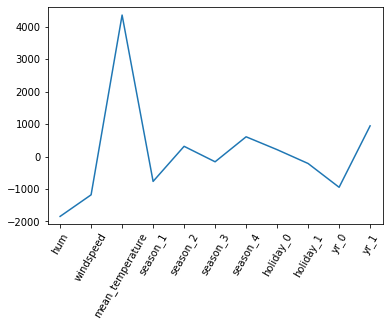

<<<-------------------------- Training Data Score ----------------------------->

r square   0.8192789600830531
Adjusted r square:0.8158035554692656
MAPE:18.823319860331754
MSE: 577338.5002617418
RMSE: 759.8279412220518
RMSLE: 0.24342913996602894

<<<-------------------------- Test Data Score --------------------------------->

r square   0.5559290185588124
Adjusted r square:0.5197454571080489
MAPE:165.67416822840897
MSE: 1560554.5670585234
RMSE: 1249.2215844511027
RMSLE: 0.5425700111923225


In [58]:
# Representing a reg regressor
reg = LinearRegression(copy_X= True, fit_intercept=True)
# Fit the regressor to the data
reg.fit(train_features,train_target_cnt)
# Compute and print the coefficients
reg_coef = reg.coef_
print(reg_coef)

# Plotting the coefficients
plt.plot(range(len(feature.columns)), reg_coef)
plt.xticks(range(len(feature.columns)), feature.columns.values, rotation=60)
plt.margins(0.04)
plt.show()
test_scores(reg)

Observations: 367
Training Observations: 185
Testing Observations: 182
Observations: 549
Training Observations: 367
Testing Observations: 182
Observations: 731
Training Observations: 549
Testing Observations: 182


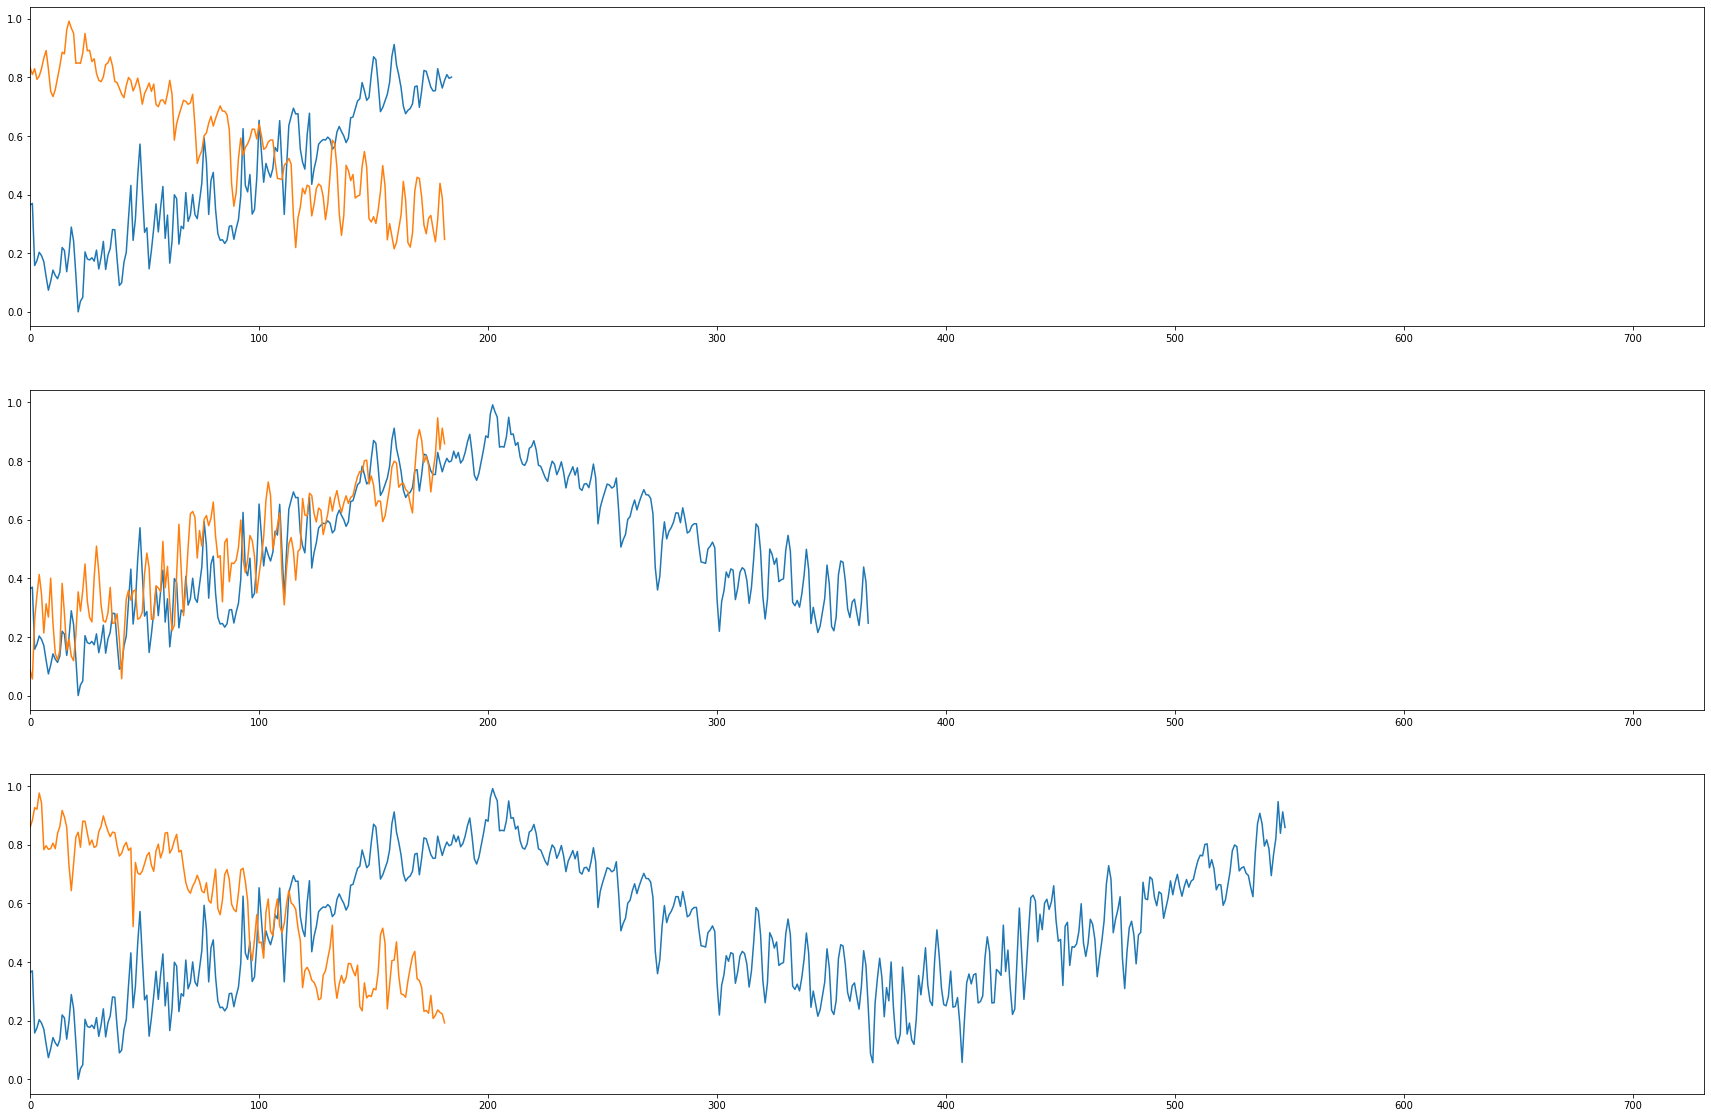

In [59]:
X = feature.values
splits = TimeSeriesSplit(n_splits=3)
plt.figure(figsize=(30,20))
index = 1
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    plt.subplot(310 + index)
    plt.xlim(0,731)
    plt.plot(pd.DataFrame(train).iloc[:,2])
    plt.plot(pd.DataFrame(test).iloc[:,2])
    index += 1
plt.show()

In [60]:
####################################################  Ridge Reggression ###############################################

# Setup the parameters and distributions to sample
param_distribution = {'alpha':np.logspace(-4, 0, 50),
          'normalize':[True,False],
             'max_iter':range(500,5000,500)}
# Instantiate a Decision ridge classifier
ridge = Ridge()
# Instantiate the gridSearchCV object
ridge_cv = GridSearchCV(ridge, param_distribution, cv=5,scoring='r2')
# Fitting it into the data
ridge_cv.fit(feature, t_cnt)
print("Tuned Decision ridge Parameters: {}".format(ridge_cv.best_params_))
print("Best score is {}".format(ridge_cv.best_score_))

Tuned Decision ridge Parameters: {'alpha': 0.10481131341546852, 'max_iter': 500, 'normalize': True}
Best score is 0.3576225700803727


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[-1568.88099362 -1112.51868484  3495.58848438  -834.86967227
   399.72129084   114.55978035   503.52724931   197.04643972
  -197.04643972  -913.67225734   913.67225734]


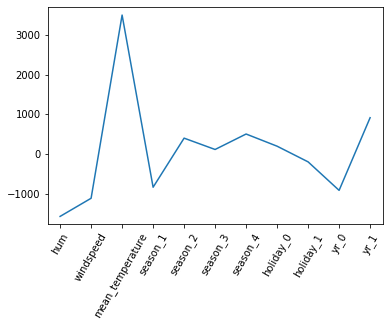

<<<-------------------------- Training Data Score ----------------------------->

r square   0.8136327206876188
Adjusted r square:0.8100487345469961
MAPE:19.538629276871102
MSE: 595376.197400807
RMSE: 771.6062450504189
RMSLE: 0.24768246662698293

<<<-------------------------- Test Data Score --------------------------------->

r square   0.5186186841971538
Adjusted r square:0.47939502142803303
MAPE:166.43642307332297
MSE: 1691670.571300917
RMSE: 1300.6423687166728
RMSLE: 0.5487951171568363


In [61]:
#Representing a ridge regressor
ridge = Ridge(alpha=0.10481131341546852, normalize=True,max_iter = 500)
# Fit the regressor to the data
ridge.fit(train_features,train_target_cnt)
# Compute and print the coefficients
ridge_coef = ridge.coef_
print(ridge_coef)

# Plotting the coefficients
plt.plot(range(len(feature.columns)), ridge_coef)
plt.xticks(range(len(feature.columns)), feature.columns.values, rotation=60)
plt.margins(0.04)
plt.show()
test_scores(ridge)

In [62]:
############################################## Decision Tree #################################################

# Setup the parameters and distributions to sample from
param_distribution = {'max_depth': range(2,16,2),
              'min_samples_split': range(2,16,2)}
# Instantiate a Decision tree classifier
tree = DecisionTreeRegressor()
# Instantiate the gridSearchCV object
tree_cv = GridSearchCV(tree, param_distribution, cv=3)
# Fitting it into the data
tree_cv.fit(feature, t_cnt)
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 14, 'min_samples_split': 10}
Best score is 0.33798064706505576


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[6.75227789e-02 2.04012101e-02 5.74286063e-01 0.00000000e+00
 6.86770709e-03 1.92097005e-04 5.41520869e-02 8.95021347e-04
 0.00000000e+00 0.00000000e+00 2.75683036e-01]


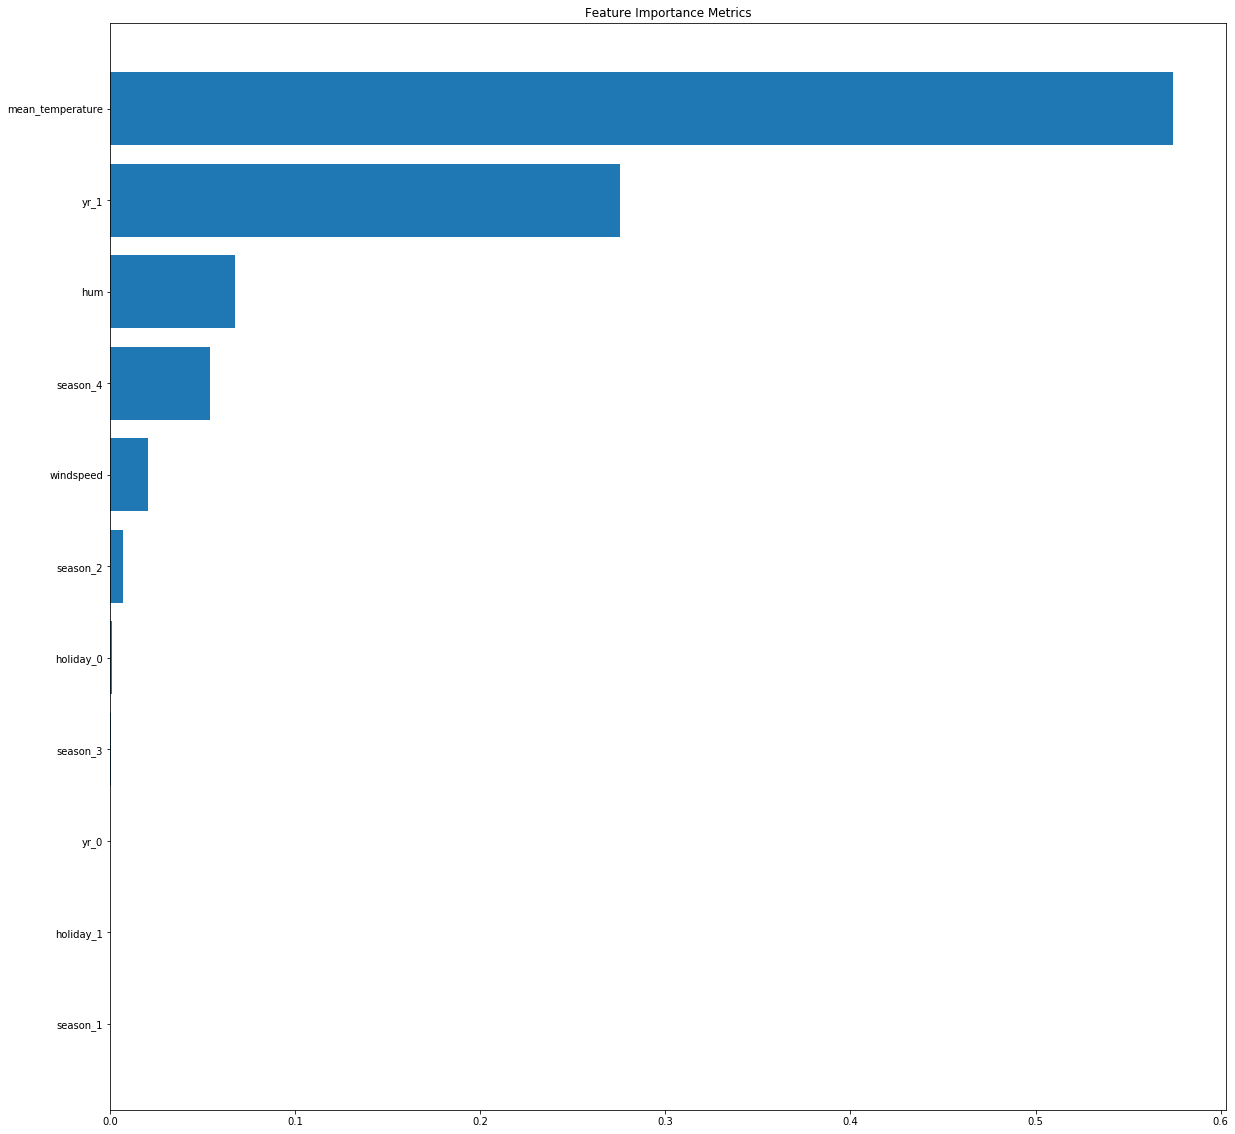

<<<-------------------------- Training Data Score ----------------------------->

r square   0.9122819012498239
Adjusted r square:0.9105950147353974
MAPE:12.174632179114866
MSE: 280227.6680209003
RMSE: 529.3653445597854
RMSLE: 0.16975601735807236

<<<-------------------------- Test Data Score --------------------------------->

r square   0.5011217687358502
Adjusted r square:0.4604724313735862
MAPE:168.18455923294084
MSE: 1753158.2443840783
RMSE: 1324.0688216192082
RMSLE: 0.5458118522710951


In [63]:
# Instantiate a tree regressor
tree = DecisionTreeRegressor(max_depth= 6, min_samples_split=4)
# Fit the regressorn intothe data
tree.fit(train_features,train_target_cnt)
# Print the coefficients
tree_features = tree.feature_importances_
print(tree_features)
# Sorting of features
indices = np.argsort(tree_features)[::1]
# Rearrange feature names to make them match the sorted features
names = [feature.columns[i] for i in indices]
# Creating the plot
fig = plt.figure(figsize=(20,20))
plt.title("Feature Importance Metrics")
plt.barh(range(pd.DataFrame(train_features).shape[1]),tree_features[indices],align = 'center')
plt.yticks(range(pd.DataFrame(train_features).shape[1]), names)
plt.show()
# Forecasting
test_scores(tree)

In [64]:
################################################# Random Forest ###########################################################


# Create the random grid for Ranodm Forest
random_grid = {'n_estimators': range(100,700,100),
               'max_depth': range(10,20,1),
               'min_samples_split':range(2,5,1)}
# Instantiate a Decision Forest classifier
Forest = RandomForestRegressor()
# Instantiate the gridSearchCV object
Forest_cv = GridSearchCV(Forest, random_grid, cv=5)
# Fitting it into the data
Forest_cv.fit(feature, t_cnt)
print("Tuned Decision Forest Parameters: {}".format(Forest_cv.best_params_))
print("Best score is {}".format(Forest_cv.best_score_))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Tuned Decision Forest Parameters: {'max_depth': 16, 'min_samples_split': 2, 'n_estimators': 100}
Best score is 0.318453873570867


[0.08611894 0.04193566 0.56680454 0.01235261 0.00567728 0.00072487
 0.03787862 0.00132853 0.00132818 0.11078162 0.13506917]


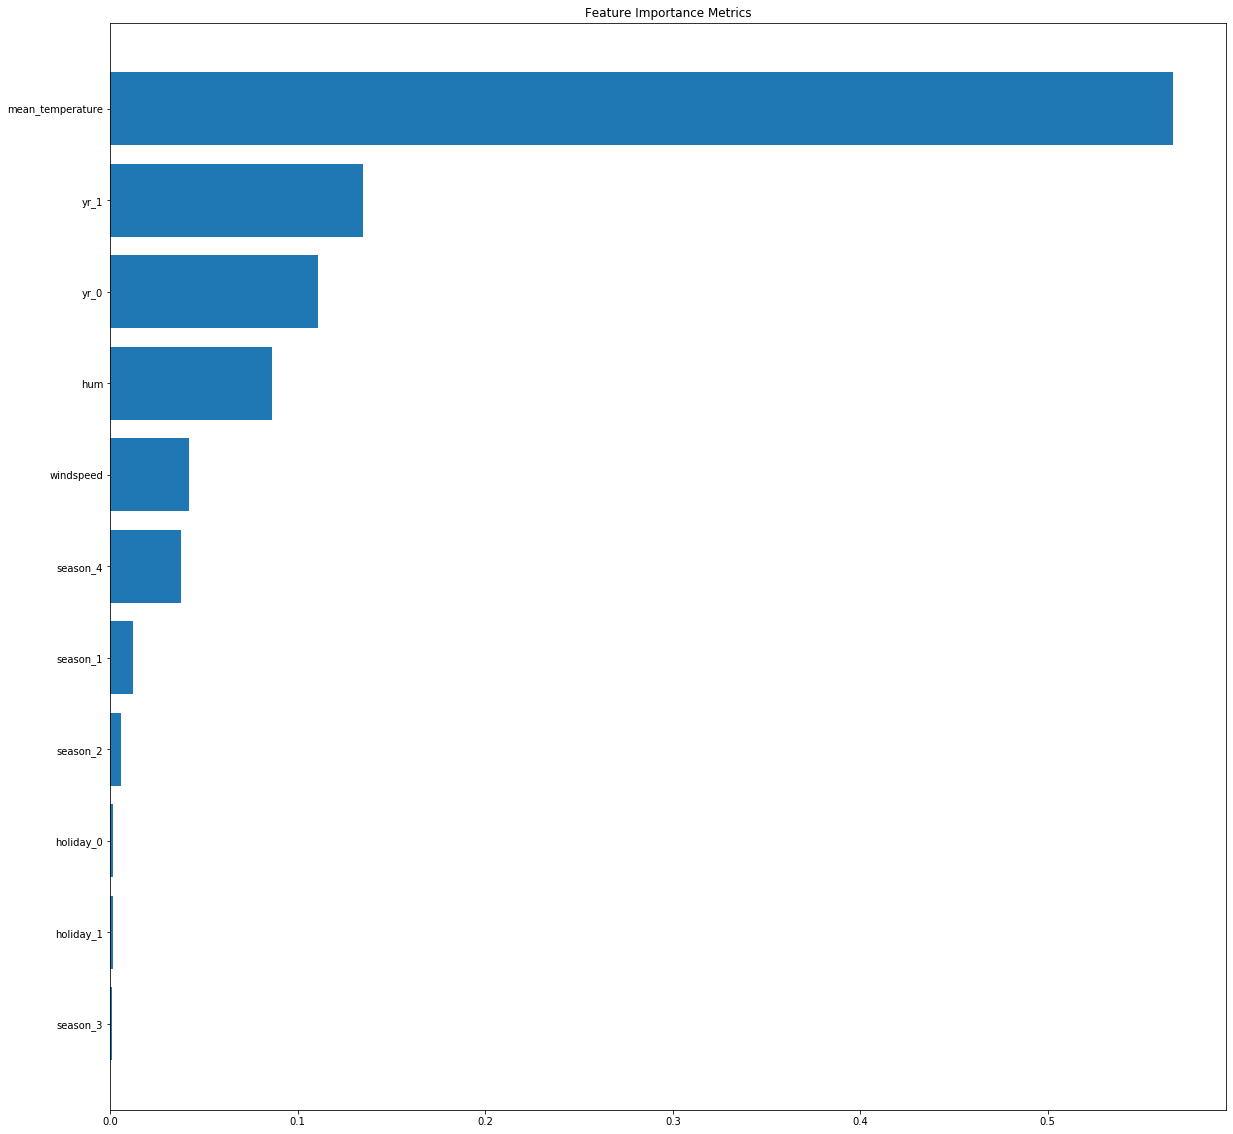

<<<-------------------------- Training Data Score ----------------------------->

r square   0.981629103301534
Adjusted r square:0.9812758168265635
MAPE:6.267918262643795
MSE: 58688.38488993863
RMSE: 242.25685726092178
RMSLE: 0.1061945824005307

<<<-------------------------- Test Data Score --------------------------------->

r square   0.5691404661866963
Adjusted r square:0.5340333930611678
MAPE:163.9526412479556
MSE: 1514126.888163051
RMSE: 1230.4986339541588
RMSLE: 0.5333504736638268


In [65]:
# Instantiate a random forest regressor
Forest = RandomForestRegressor(max_depth= 15, min_samples_split=2,n_estimators=100)
# Fit the regressor into the data
Forest.fit(train_features,train_target_cnt)
# Print the coefficients
Forest_features = Forest.feature_importances_
print(Forest_features)
# Sorting of features
indices = np.argsort(Forest_features)[::1]
# Rearrange feature names to make them match the sorted features
names = [feature.columns[i] for i in indices]
# Creating the plot
fig = plt.figure(figsize=(20,20))
plt.title("Feature Importance Metrics")
plt.barh(range(pd.DataFrame(train_features).shape[1]),Forest_features[indices],align = 'center')
plt.yticks(range(pd.DataFrame(train_features).shape[1]), names)
plt.show()
# Forecasting
test_scores(Forest)

In [69]:
test_predicted = Forest.predict(test_features)
pd.DataFrame(test_predicted,index = test_target_cnt.index,columns=['cnt']).head()

,cnt
dteday,
2012-08-07,7157.993333
2012-08-08,7199.783333
2012-08-09,6548.320107
2012-08-10,6538.524128
2012-08-11,6444.819500


In [70]:
pd.DataFrame(test_target_cnt,columns=['cnt']).head()

,cnt
dteday,
2012-08-07,7273.0
2012-08-08,7534.0
2012-08-09,7286.0
2012-08-10,5786.0
2012-08-11,6299.0


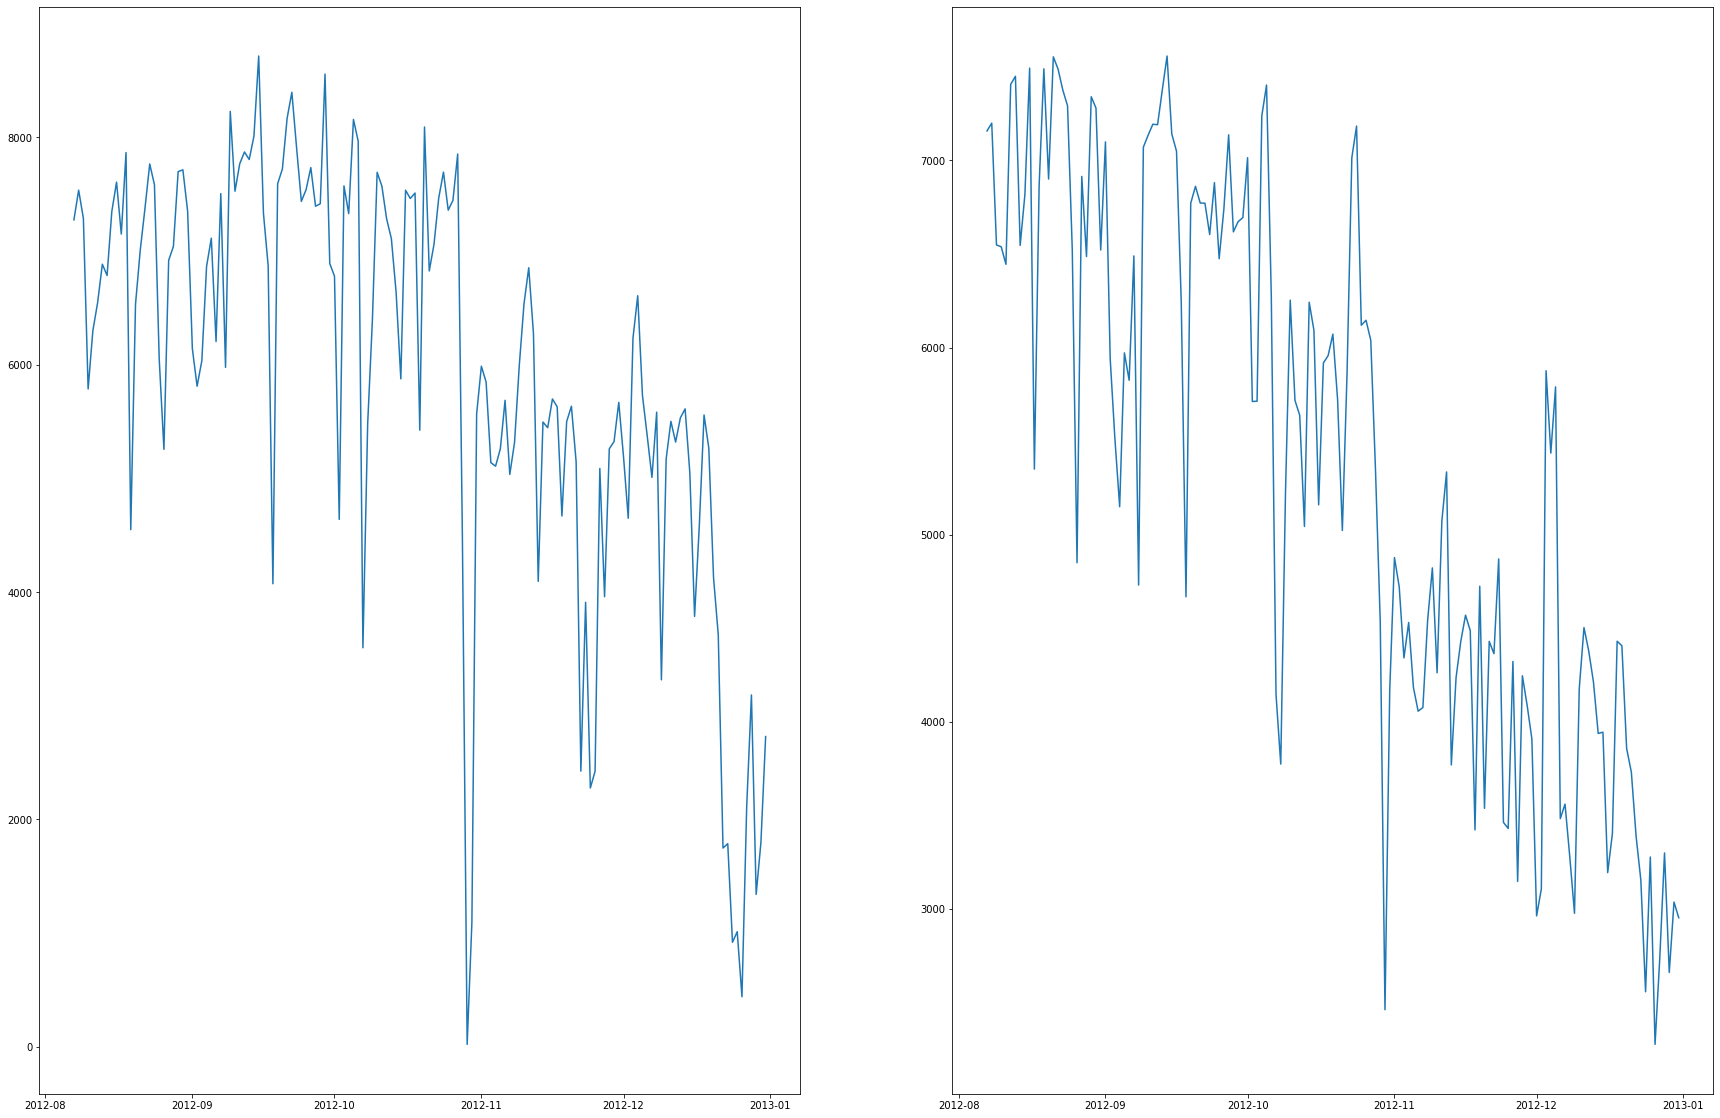

In [71]:
plt.figure(figsize=(30,20))
plt.subplot(121)
plt.plot(test_target_cnt)
plt.subplot(122)
plt.plot(pd.DataFrame(test_predicted,index = test_target_cnt.index,columns=['cnt']))
plt.show()

In [ ]:
# Random Forest is the best performing model and our distribution is almost identical.